In [1]:
import networkx as nx
import matplotlib # if abbreviating this, use "as mpl"
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import pickle
import json
%matplotlib notebook

In [2]:
### Nodes ###
## 1.1    Open node DataFrames
## 1.1.1. All nodes
## 1.1.2. Subnetwork connection nodes
## 1.1.3. Intermediate nodes
## 1.1.4. Subnetwork "nodes"

## 1.2    Organisation of the DataFrames
## 1.2.1. del_coord, DataFrame with deleting entries
## 1.2.2. Deleting of nodes 
## 1.2.3. One DataFrame with all nodes

In [3]:
####### Original data from dataprocessing Network :NODES #########
coord_orig = pd.read_csv('../preprocesses/section_data/net_coord.csv')
##################################################################

coord = coord_orig[["NodeID","CoordX", "CoordY"]].copy()

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(coord)
  
### What am I doing? ###
#
#open data file about information of all nodes, using only the coordinates

                                 NodeID         CoordX         CoordY
0                             201827771  912872.500000  450983.331000
1                     42784779-SPOTLOAD  553936.808426  146115.680388
2                              42933083  888887.500000  326986.330950
3                              52894498  804812.500000  578983.330950
4                              42805981  554167.347000  145823.926000
5                              42875178  819443.716072  539095.272274
6                              52061191  824993.716072  311092.272274
7                     42762171-SPOTLOAD  554234.887258  145830.116397
8                              42773422  554224.880000  146486.816000
9                     42774787-SPOTLOAD  554004.786862  145857.488915
10                             42800598  554172.665000  145749.726000
11                             42826835  554213.574000  146132.659000
12                             42891158  823233.716072  579095.272274
13                  

In [4]:
### Nodes ###

############## Original data from dataprocessing Network :SUBNETWORK CONNECTIONS ######################
subnetwork_connections = pd.read_csv('../preprocesses/section_data/result_subnetwork_connections.csv')
#######################################################################################################

subnetwork_connections = subnetwork_connections[["NodeID", "ConnectorCoordX", "ConnectorCoordY"]].copy()

subnetwork_connections = subnetwork_connections.rename(index=str, columns={"ConnectorCoordX": "CoordX", "ConnectorCoordY": "CoordY"})

subnetwork_connections['NodeID'] = subnetwork_connections['NodeID'].astype(str)


#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(subnetwork_connections)
    
### The two nodes that I deleted in order to cut the 10 kV and the 21 kV grid are added manually toward the grid
grid_island_node_10 = subnetwork_connections[subnetwork_connections['NodeID'].str.contains('52113248')] 
grid_island_node_21 = subnetwork_connections[subnetwork_connections['NodeID'].str.contains('52117850')] 
### What am I doing? ###
#
# open file about the subnetwork_connection nodes, changing column names of the coordinates,
# so it fit with the DataFrame of the node coordinates

In [5]:
### Nodes ###

################## Rearranged data: original data --> Intermediate_test #########################
intermediate_nodes = pd.read_csv('../preprocesses/section_data/intermediate_coords_while_new.csv')
### the intermediate nodes are only necessary to have a nicer plot ###
#################################################################################################

intermediate_nodes = intermediate_nodes[["SectionID", "CoordX", "CoordY"]].copy()

intermediate_nodes = intermediate_nodes.rename(index=str, columns={"SectionID": "NodeID"})

intermediate_nodes['NodeID'] = intermediate_nodes['NodeID'].astype(str)


#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(intermediate_nodes)
    
### What am I doing? ###
#
# open file about intermediate nodesm with their SectionID, SeqNumber and each coordinates
#
# Wikipedia: In such a network the source and destination cannot communicate to each other directly because
#            the distance between the source and destination is greater than the transmission range of both of them, 
#            hence the need for intermediate node(s) to relay.

In [6]:
# deleting the intermediate node, where the coordinates are wrong
### again intermediate nodes are here only for plotting reasons, so shouldnot be a big deal

intermediate_nodes_2 = intermediate_nodes[intermediate_nodes['CoordX'] < 555000]
#intermediate_nodes_2
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(intermediate_nodes_2)

In [7]:
### DataFrame for the coordinates of the nodes of the subnetworks, created in Subnetwork_recreation

########## Rearranged Data: orignal data -> Subnetwork_recreation ##########################################
subnetworks_nodes_orig = pd.read_csv('subnetworks_nodes_new.csv')
### Nodes with coordinates outside the considered intervall are set to the coordiantes of the subnetwork ###
### Again its only for plotting reasons and does not affect the grid #######################################
############################################################################################################

subnetworks_nodes = subnetworks_nodes_orig[["NodeID", "CoordX", "CoordY"]].copy()
subnetworks_nodes["NodeID"] = subnetworks_nodes["NodeID"].astype(str)

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(subnetworks_nodes)


In [8]:
### Original data from preprocessing: HEADNODES (Not used at all), could be deleted ###
headnodes = pd.read_csv('../preprocesses/section_data/headnodes.csv')
#######################################################################################

headnodes = headnodes[["NodeID", "NetworkID"]].copy()

headnodes['NodeID'] = headnodes['NodeID'].astype(str)
#headnodes

In [9]:
### Nodes ###

### Putting the "wrong" coordinates in better position (it suckz, since it takes forever)
intermediate_nodes_2 = intermediate_nodes.copy() ### No change, for the coordinates.
#################################################### If following for loop is used, it could be uncommented 

###### If one want to have a more suitable plot, one might uncommend this part ##########
#for i,row in intermediate_nodes.iterrows():
#    if intermediate_nodes['CoordX'][i] >=555000:
#        intermediate_nodes_2['CoordX'][i] = intermediate_nodes['CoordX'][i] - 255000
#        intermediate_nodes_2['CoordY'][i] = intermediate_nodes['CoordY'][i] - 272000
#        print('change im node ' +str(i))
#    else:
#        continue
########################################################################################


In [10]:
### To seperate the 10kV with the 21kV grid. Deleting of all lines no connected to the "observed" 10kV grid
del_coord = coord[coord["CoordY"] >= 150000]
not_del = coord[coord['CoordY'] <= 419150]
not_del_2 = not_del[not_del['CoordY'] >= 419050]
del_coord = del_coord[~del_coord['NodeID'].isin(not_del_2['NodeID'])]

del_coordX = coord[coord['CoordX'] > 817040]
special_node = coord[coord['NodeID'] == '42882929']
frames = [del_coordX, del_coord, special_node]
del_coord = pd.concat(frames)

#del_coord = del_coord[~del_coord['NodeID'].isin(subnetwork_connections['NodeID'])] # putting nodes from the deleting list, that are in the subnetwork dataframe
#del_coord = del_coord[~del_coord['NodeID'].isin(subnetworks_nodes['NodeID'])] 

del_coord = pd.DataFrame(del_coord.reset_index(drop=True))
del_coord["NodeID"] = del_coord["NodeID"].astype(str)

#del_coord = del_coord[0:0]
#### Checking if some nodes are deleted, dataframe should be empty ###

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(del_coord)

del_coord = del_coord.drop_duplicates()
del_coord = del_coord[0:0]

### What am I doing? ###
#
# Creating a table (del_coord) with all the nodes that are out of the considered intervall
# and have therefore wrong coordinates. 

In [11]:
### Nodes ###

#### If del_coord dataframe above is not empty, one could use following to still get a plot #######
#in_coord = coord[~coord['NodeID'].isin(del_coord['NodeID'])].copy()
###################################################################################################

in_coord = coord.copy() ##### In order to not have to change to much variables

intermediate_nodes_sep = intermediate_nodes_2.rename(index=str, columns={"SectionID": "NodeID"})

##########################################################################################################
########### Saving nodes for pandapower I ################################################################
### This part was the first attend to use all nodes in Pandapower ###
### The second attend based on voltage levels is coming later #######

### saving only subnetwork nodes which are considered in the network, which should be all of them ##
#subnetworks_nodes_2 = subnetworks_nodes[subnetworks_nodes['NodeID'].isin(in_coord['NodeID'])]
### Test if all of them are in deed considered (If df is empty)
#subnetworks_nodes_2[~subnetworks_nodes_2['NodeID'].isin(subnetworks_nodes['NodeID'])]
####################################################################################################

#### Arranging the nodes, so the dataframe in_coord_2 only contains the "common" nodes ###
#### And "special" nodes are saved in there specific dataframe #### 

#in_coord_2 = in_coord[in_coord["CoordX"] <= 555000] # deleting nodes with the old "wrong" coordinates (usually not nessecary) 

### Some Nodes might appear twice, so a bit rearraning 
#in_coord_2 = in_coord_2[~in_coord_2['NodeID'].isin(subnetworks_nodes['NodeID'])]
#in_coord_2 = in_coord_2[~in_coord_2['NodeID'].isin(subnetwork_connections['NodeID'])]
#in_coord_2 = in_coord_2[~in_coord_2['NodeID'].isin(intermediate_nodes_sep['NodeID'])]
 
## Creating csv for the pandapower file    

#in_coord_2.to_csv(r'network_data/nodes_with_im.csv', header=True, index=None, mode='a')
#subnetwork_connections.to_csv(r'network_data/sub_con_nodes.csv', header=True, index=None, mode='a')
#intermediate_nodes_sep.to_csv(r'network_data/intermediate_nodes_sep.csv', header=True, index=None, mode='a')
#subnetworks_nodes.to_csv(r'network_data/subnet_nodes.csv', header=True, index=None, mode='a')



### What am I doing ###
#
# Creating csv for the pandapower simulation
### This was done in order to do a big simulation for all nodes, not used until now: 5.2.2018.

In [12]:
### Nodes ###
#############
intermediate_nodes_sep = intermediate_nodes_sep[0:0] #### dont need them for pandapower
#############

#### Creating one dataframe with all nodes
frames = [in_coord,intermediate_nodes_sep,subnetwork_connections,subnetworks_nodes]  #
in_coord = pd.concat(frames)

in_coord["NodeID"] = in_coord["NodeID"].astype(str)


#with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
#    print(in_coord.reset_index(drop=True))

### What am I doing? ###
#
# Connect the tables of the nodes and subnetwork nodes: the subnetwork nodes are now twice in the list, one time with
# "wrong" coordinates and one time with the correct ones.
# Intermediate_nodes are put in the node coordinate table, to be displayed in the graph

In [13]:
###### Subgrid #######

##### The json file is created later on, so one need to run this twice
#### First create the json file, than load it 

with open('network_data/grid_island.json') as json_data:
    grid_islands = json.load(json_data)

### Their are only two grid island which have not got 0.42 kV, which is grid 2 (21kV) and 3 (10kV)
### File: "Voltage_check_grid_island" is checking which voltage is in which grid-island 

grid = pd.DataFrame.from_dict(grid_islands['9']) ############### changing this to plot different gid-islands 
grid = grid.rename(columns = {0:'NodeID'}) 

grid

in_coord = in_coord[in_coord['NodeID'].isin(grid['NodeID'])] ## changing in_coord (which contains all nodes)
############################################################### to only the nodes that are in the gird-island

#in_coord = in_coord.append(grid_island_node_10) ### for grid 3 ( 10kV)
#in_coord = in_coord.append(grid_island_node_21) ### for grid 2 (21kV)
in_coord['NodeID'] = in_coord['NodeID'].astype(str)

with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(grid.reset_index(drop=True))

     NodeID
0  52101422


In [14]:
### 2. Section ###
### 2.1.   Open Section DataFrames
### 2.1.1. Sections
### 2.1.2. Sections between intermediate nodes
### 2.2.   Organisation of sections
### 2.2.1. Deleting sections to not existing nodes
### 2.2.2. Creating on DataFrame for all section



In [15]:
### Transformer sections, assign each transformer the equipment information 

####### Data input#############################################################
#### Original data from preprocessing Network: TRANSFORMER
transformer = pd.read_csv('network_data/transformer.csv')

#### Original data from preprocessing Equipment: TRANSFORMER_SETTINGS
transformer_settings = pd.read_csv('network_data/transformer_settings.csv')
###############################################################################

transformer_settings = transformer_settings.rename(index=str, columns={"ID": "EqID"})
transformer = transformer.merge(transformer_settings, 'outer', 'EqID')
transformer = transformer.dropna(subset=['SectionID'])

transformer = transformer[["SectionID" , "FromNodeID", "DeviceNumber", "KVA", "KVLLprim", "KVLLsec"]].copy()

### Getting rid of the .0 (looks a bit unhandy, but it works...) ### 
transformer[["SectionID" , "FromNodeID", "DeviceNumber"]] = transformer[["SectionID" , "FromNodeID", "DeviceNumber"]].astype(int)
transformer[["SectionID" , "FromNodeID", "DeviceNumber"]] = transformer[["SectionID" , "FromNodeID", "DeviceNumber"]].astype(str)

transformer = transformer.rename(index=str, columns={"DeviceNumber": "ToNodeID"})


transformer

,SectionID,FromNodeID,ToNodeID,KVA,KVLLprim,KVLLsec
0,42547360,42934976,42934975,400.0,10.6,0.42
1,42571987,42905802,42905802,630.0,10.6,0.42
2,42590298,42980182,42980182,400.0,10.6,0.42
3,42552624,42878165,42882930,100.0,10.6,0.42
4,42574167,42902140,42902140,630.0,21.0,0.42
5,214551743,105470910,105470910,630.0,21.0,0.42
6,42595956,42941227,42882789,10000.0,21.0,10.60
7,42613835,42951838,42951839,630.0,21.0,0.42
8,42571862,42891069,42891068,630.0,10.6,0.42
9,42574494,42945679,42945679,630.0,21.0,0.42


In [16]:
### Section ###

#### Original data from preporcessing Network: SECTION ####
section_orig = pd.read_csv('../preprocesses/section_data/result_section_better.csv')
###########################################################

section = section_orig[["SectionID", "FromNodeID", "ToNodeID"]].copy()

section['SectionID'] = section['SectionID'].astype(str)
section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)

### What am I doing? ###
#
# Table about the connections of each nodes: sections.

In [37]:
#section = section[section['FromNodeID'] == '52117850']
#section
### section 43994411 is chosen to be a transformer between 21 and 10 kV
#section = section[~section['SectionID'].str.contains('43994411')] 

,SectionID,FromNodeID,ToNodeID
1711,43994411,52117850,52113248


In [18]:
### Intermediate sections ####

### Rearranged data: original data --> intermediate_test ####
intermediate_connections = pd.read_csv('../preprocesses/section_data/intermediate_nodes_new.csv')
#############################################################


intermediate_connections = intermediate_connections[["SectionID", "FromNodeID", "ToNodeID"]].copy()
intermediate_connections['SectionID'] = intermediate_connections['SectionID'].astype(str)
intermediate_connections['FromNodeID'] = intermediate_connections['FromNodeID'].astype(str)
intermediate_connections['ToNodeID'] = intermediate_connections['ToNodeID'].astype(str)

### Intermediate connections, which nodes are in the considered intervall and have therefor valid coordinates. ###
intermediate_connections_2 = intermediate_connections[intermediate_connections['FromNodeID'].isin(in_coord['NodeID'])]
intermediate_connections_3 = intermediate_connections[intermediate_connections['ToNodeID'].isin(in_coord['NodeID'])] 

frames = [intermediate_connections_2,intermediate_connections_3]
intermediate_connections = pd.concat(frames)

intermediate_connections = intermediate_connections[["SectionID", "FromNodeID", "ToNodeID"]].copy().drop_duplicates()

intermediate_connections = intermediate_connections.reset_index()

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(intermediate_connections)


### What am I doing? ###
#
# csv file about all intermediate nodes. Change to strings for later comparison.
# Intermediate Nodes that appear more than once are deleted, have to check where they come from! 

In [19]:
#### The intermediate connections are (as the intermediate nodes) only for the whole grid, not for subgrids #####
#### Effective: 5.2.2018  ###########
intermediate_connections = intermediate_connections[0:0] #### dont need them for pandapower
#####################################

### The dataframe: section contains the conections between the first node and the last node.
### If there are intermediate nodes between them, this section have to be deleted,
### since it is already stored in the intermediate_connections dataframe
section = section[~section['SectionID'].isin(intermediate_connections['SectionID'])]
### If considering subgrids, intermediate_connections should be emtpy, and therefore no change here
#####################################################################################

### What am I doing? ###
#
# Sections that are cut into parts with intermediate nodes are deleted from the section dataframe.

In [20]:
### Combining both sections ###
frames = [section, intermediate_connections] # ,transformer
section = pd.concat(frames)

########## Creating grid-island by deleting the sections which contains transformers and therefore connecting grid-islands
section_island = section[~section['SectionID'].isin(transformer['SectionID'])].reset_index()

section = section_island[['SectionID', 'FromNodeID', 'ToNodeID']]
#######################################################################

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(section)


                              SectionID FromNodeID  \
0                              42571222   42901266   
1                              42533575   42890834   
2                              43939209   42787380   
3                              43825506   42698357   
4                              43971553   42703621   
5                              94588448   52857530   
6                     42783662-SPOTLOAD   42783662   
7                              43895417   52889602   
8                              42533570   42890835   
9                              43906026   42785340   
10                             43939204   42660293   
11                    42787380-SPOTLOAD   42787380   
12                             93849829   93848443   
13                             43884803   42686073   
14                             42571224   42901268   
15                    42769314-SPOTLOAD   42769314   
16                             52107522   42890831   
17                          

In [21]:

section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)


#### Only using sections of grid island #######################
section_3_2 = section[section['FromNodeID'].isin(grid['NodeID'])]
section_3_3 = section[section['ToNodeID'].isin(grid['NodeID'])]

section_3_2

frames = [section_3_2,section_3_3] 
section_3 = pd.concat(frames)
###################################################################

section_3 = section_3.drop_duplicates().reset_index(drop=True)

section_3 = section_3[~section_3['ToNodeID'].isin(del_coord['NodeID'])]
section_3 = section_3[~section_3['FromNodeID'].isin(del_coord['NodeID'])]
                      
#### Checking #######
test_section = section_orig[~section_orig['ToNodeID'].isin(section_3['ToNodeID'])]
test_section.reset_index

test_section # If empty, no sections are deleted
#### Using subgrids, it should not be empty


### What am I doing? ###
#
# Deleting the sections between Nodes that are out of the considered intervall, with the table del_coord,
# for both: the FromNodeID and the ToNodeID. 

/home/bigboss/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bigboss/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SectionID,FromNodeID,FromNodeIndex,ToNodeID,ToNodeIndex,Phase,ZoneID,SubNetworkId,EnvironmentID
0,42571222,42901266,0,42901267,0,ABC,NaN,027 JURA - VV - 5890 (43480902),0
1,42533575,42890834,0,42890827,0,ABC,NaN,GUTENBERG - VV - 5890 (43394084),0
2,43939209,42787380,0,42687308,0,ABC,NaN,NaN,0
3,43825506,42698357,0,42684664,0,ABC,NaN,NaN,0
4,43971553,42703621,0,42694044,0,ABC,NaN,NaN,0
5,94588448,52857530,0,94588294,0,ABC,NaN,NaN,0
6,42783662-SPOTLOAD,42783662,0,42783662-SPOTLOAD,0,ABC,NaN,NaN,0
7,43895417,52889602,0,42697592,0,ABC,NaN,NaN,0
8,42533570,42890835,0,42890827,0,ABC,NaN,GUTENBERG - VV - 5890 (43394084),0
9,43906026,42785340,0,42692978,0,ABC,NaN,NaN,0


In [22]:
#DG = nx.DiGraph()
DG = nx.Graph()

### What am I doing? ###
#
# Creating a directed graph

In [23]:
#### For showing the mid voltage nodes ###
### Source_grid contains all known rated voltages nodes
### This part is just for your information and is used to plot the known voltage nodes in a different size and color.

source_grid = pd.read_csv('network_data/source_equivalent.csv')

source_grid['NodeID'] = source_grid['NodeID'].astype(str)
source_grid = source_grid[source_grid['NodeID'].isin(grid['NodeID'])]

source_04kv = source_grid[source_grid['Voltage'] == 0.42]

source_10kv = source_grid[source_grid['Voltage'] == 10.6]

source_21kv = source_grid[source_grid['Voltage'] == 21.0]
transformer_10_04 = transformer[transformer['KVLLprim'] == 10.60]
transformer_21_04 = transformer[transformer['KVLLprim'] == 21.0]
#transformer_21_04 = transformer[transformer['KVLLsec'] == 10.60]

source_04kv


,Unnamed: 0,NodeID,LoadModelName,Voltage,OperatingAngle1,OperatingAngle2,OperatingAngle3,PositiveSequenceResistance,PositiveSequenceReactance,NegativeSequenceResistance,NegativeSequenceReactance,ZeroSequenceResistance,ZeroSequenceReactance,OperatingVoltage1,OperatingVoltage2,OperatingVoltage3,BaseMVA,ImpedanceUnit


In [24]:
pos = {}
pos = {row["NodeID"]: (row["CoordX"],row["CoordY"]) for _,row in in_coord.iterrows()}

node_spotload = in_coord[in_coord["NodeID"].str.contains("SPOTLOAD")]
node_pv = in_coord[in_coord["NodeID"].str.contains("PHOTOVOLTAIQUE")]
node_subn = in_coord[in_coord['NodeID'].isin(subnetwork_connections['NodeID'])]
node_interm_check = intermediate_nodes_sep[intermediate_nodes_sep['NodeID'].str.contains( "[\(][0-9]*[\)]" )]
node_interm = in_coord[in_coord['NodeID'].isin(node_interm_check['NodeID'])]
#node_subnetwork = in_coord[in_coord['NodeID'].isin(subnetworks_nodes['NodeID'])]

#### voltage nodes #############

node_04kv = in_coord[in_coord["NodeID"].isin(source_04kv['NodeID'])]
node_10kv = in_coord[in_coord["NodeID"].isin(source_10kv['NodeID'])]
node_21kv = in_coord[in_coord["NodeID"].isin(source_21kv['NodeID'])]

### transformer ####
#node_transformer = in_coord[in_coord['NodeID'].isin(transformer['FromNodeID'])]

node_transformer_21 = in_coord[in_coord['NodeID'].isin(transformer_21_04 ['FromNodeID'])]

node_transformer = in_coord[in_coord['NodeID'].isin(transformer_10_04['FromNodeID'])]
####################################

frames = [node_04kv, node_10kv, node_21kv, node_spotload, node_pv, node_subn, node_interm, node_transformer] # ,node_subnetwork
node_spec = pd.concat(frames)
node_spec = node_spec.drop_duplicates(keep = 'first')

node_rest = in_coord[~in_coord["NodeID"].isin(node_spec)]


color_spotload = {row["NodeID"]: "blue" for _,row in node_spotload.iterrows()}
color_pv = {row["NodeID"]: "yellow" for _,row in node_pv.iterrows()}
color_rest = {row["NodeID"]: "lightgreen" for _,row in node_rest.iterrows()}
color_subnet = {row["NodeID"]: "purple" for _,row in node_subn.iterrows()}
color_interm = {row["NodeID"]: "red" for _,row in node_interm.iterrows()}
#color_subnetwork = {row["NodeID"]: "lightblue" for _,row in node_subnetwork .iterrows()}
color_node_04kv = {row["NodeID"]: "black" for _,row in node_04kv.iterrows()}
color_node_10kv = {row["NodeID"]: "black" for _,row in node_10kv.iterrows()}
color_node_21kv = {row["NodeID"]: "orange" for _,row in node_21kv.iterrows()}
color_node_transformer = {row["NodeID"]: "grey" for _,row in node_transformer.iterrows()}
color_node_transformer_21 = {row["NodeID"]: "blue" for _,row in node_transformer_21.iterrows()}


color_map = {}
color_map.update(color_rest)
color_map.update(color_interm)
color_map.update(color_subnet)
color_map.update(color_spotload)
color_map.update(color_pv)
# color_map.update(color_subnetwork)
color_map.update(color_node_04kv)
color_map.update(color_node_10kv)
color_map.update(color_node_21kv)
color_map.update(color_node_transformer)
color_map.update(color_node_transformer_21)


### What am I doing? ###
#
# 1) Classification of the nodes by searching for NodeID that contains the words SPOTLOAD or PHOTOVOLTAIQUE,
#    or are listed in the table: subnetwork_connections. The rest nodes are seen as "common nodes"
# 2) Giving each Node type a color
# 3) Creating a list for the colors, which is required for NetworkX

In [25]:


size_spotload = {row["NodeID"]: 5 for _,row in node_spotload.iterrows()}
size_pv = {row["NodeID"]: 5 for _,row in node_pv.iterrows()}
size_rest = {row["NodeID"]: 5 for _,row in node_rest.iterrows()}
size_subnet = {row["NodeID"]: 5 for _,row in node_subn.iterrows()}
size_interm = {row["NodeID"]: 1 for _,row in node_interm.iterrows()}
#size_subnetwork = {row["NodeID"]: 5 for _,row in node_subnetwork.iterrows()}
size_04kv = {row["NodeID"]: 5 for _,row in node_04kv.iterrows()}
size_10kv = {row["NodeID"]: 50 for _,row in node_10kv.iterrows()}
size_21kv = {row["NodeID"]: 20 for _,row in node_21kv.iterrows()}
size_transformer = {row["NodeID"]: 100 for _,row in node_transformer.iterrows()}
size_transformer_21 = {row["NodeID"]: 100 for _,row in node_transformer_21.iterrows()}


size_map = {}
size_map.update(size_rest)
size_map.update(size_interm)
size_map.update(size_subnet)
size_map.update(size_spotload)
size_map.update(size_pv)
#size_map.update(size_subnetwork)
size_map.update(size_04kv)
size_map.update(size_10kv)
size_map.update(size_21kv)
size_map.update(size_transformer)
size_map.update(size_transformer_21)

In [26]:
DG.add_nodes_from(pos.keys())

nx.set_node_attributes(DG, pos, 'coordinates')

values = [color_map.get(node) for node in DG.nodes()]
size = [size_map.get(node) for node in DG.nodes()]

In [27]:
lines = [(row["FromNodeID"], row["ToNodeID"]) for _, row in section_3.iterrows()]

DG.add_edges_from(lines)
DG.graph['edges']={'arrowsize':'4.0'}

### What am I doing? ###
#
# Defining the edges with the table of section_3, where only the connection of nodes are given which are in the
# considered intervall

In [28]:
print(list(DG.nodes))

['52101422']


In [29]:
list(DG.edges)

[]

In [30]:
DG.number_of_nodes()

1

In [31]:
DG.number_of_edges()

0

In [32]:
### Create a file with all subgraphs ###
### If subgraphs are considered, there should only be one graph

island_graphs = sorted(nx.connected_components(DG), key=len, reverse=True)

#dict_to_save = {int(i): list(i_gr) for i, i_gr in enumerate(island_graphs)}

#with open('grid_island.json', 'w') as fp:
#    json.dump(dict_to_save, fp)

In [33]:
### All subgraphs

island_graphs = sorted(nx.connected_components(DG), key=len, reverse=True)
island_graphs



[{'52101422'}]

<IPython.core.display.Javascript object>


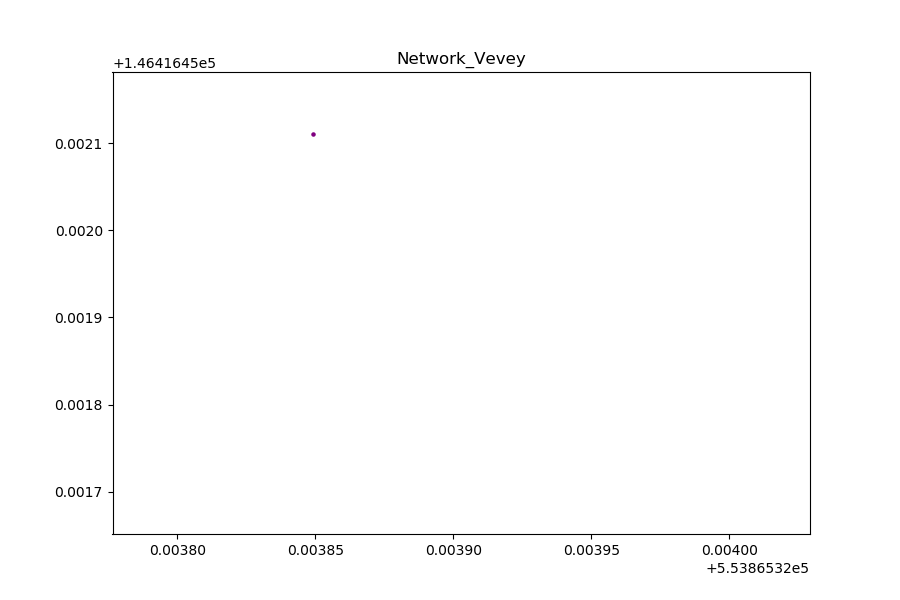

In [34]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(1, figsize=(9.0, 6.0))
nx.draw_networkx(DG, pos,width=0.5, node_color=values, with_labels=False,node_size=size)
#nx.draw_networkx(DG, pos, node_color=values, with_labels=False,node_size=0.5)
plt.title('Network_Vevey')
#plt.ylim((145400, 146800))
#plt.xlim((553500, 554500))

lightgreen = mpatches.Patch(color="lightgreen", label='Common Nodes')
blue = mpatches.Patch(color="blue", label='Spotload Nodes')
yellow = mpatches.Patch(color="yellow", label='Photovoltaic Nodes')
purple = mpatches.Patch(color="purple", label='Subnetwork Connection Nodes')
red = mpatches.Patch(color="red", label ='Intermediate Nodes')
lightblue = mpatches.Patch(color="lightblue", label ='SubNetwork "Nodes"')
#plt.legend(handles=[ lightgreen, blue, yellow, purple, red, lightblue])


#plt.savefig('vevey_network.svg', format="svg")

plt.show()

### What am I doing? ###
#
# Draw graph, with attribut of the pos (coordinates) and the node_color

In [35]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
#plt.figure(2, figsize=(9.0, 6.0))

#nx.draw_networkx(DG,pos, with_labels=False)
#plt.title('Guttenberg_Vevey')
#plt.ylim((280000, 720000))
#plt.xlim((780000, 920000))
#plt.show()

### What am I doing? ###
#
# Second draw of the intervall that is not to be considered, to check if "wrong" nodes appear.